# Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

%matplotlib inline

Firstly, we will load the available data, where the $n-1$ first columns are vectorized images and the last column correspond to an average of the irradiance value. 

Images were mapped in **HSV** and **Ycrcb** color spaces. Then only **H** and **Y** chanel was takin into account

In [4]:
d_Hue = pd.read_csv("MatHue.csv")
print d_Hue.shape
d_Hue.head()

(114, 3073)


,0.12667,0.13793,0.15278,0.14865,0.16667,0.17157,0.16667.1,0.16667.2,0.16667.3,0.17204,...,0.14167.3,0.14242.1,0.14583.15,0.15278.5,0.15537,0.16667.106,0.1746.3,0.17424.3,0.15805,3.072
0,0.12000,0.10897,0.13725,0.15104,0.14444,0.15000,0.14815,0.14744,0.14352,0.14943,...,0.12667,0.12847,0.12766,0.13605,0.14493,0.15556,0.15625,0.16333,0.14103,3.1360
1,0.11111,0.12000,0.13021,0.14141,0.13978,0.14943,0.15432,0.14286,0.14762,0.15476,...,0.12500,0.12847,0.13265,0.13667,0.14539,0.15504,0.15603,0.15986,0.14706,2.5603
2,0.10897,0.12667,0.13889,0.15000,0.15054,0.15054,0.16026,0.15385,0.15238,0.15385,...,0.13441,0.14368,0.14943,0.16092,0.17284,0.17742,0.17172,0.19192,0.16216,1.7960
3,0.11458,0.13333,0.14352,0.14414,0.15196,0.16129,0.16667,0.16111,0.15766,0.16667,...,0.14414,0.14815,0.15238,0.15766,0.17677,0.17982,0.18651,0.19259,0.16279,1.3520
4,0.11275,0.11616,0.13596,0.14035,0.14865,0.14706,0.15517,0.15054,0.14815,0.15476,...,0.13514,0.13158,0.14474,0.14474,0.16667,0.17157,0.17568,0.17130,0.15000,1.2510


In [5]:
d_YCrCb = pd.read_csv("YMat.csv")
print d_YCrCb.shape
d_YCrCb.head()

(114, 3073)


,48,54,62,67,69,69.1,67.1,68,78,66,...,97.64,94.71,98.60,109.29,118.13,131.15,140.12,145.21,114.23,3.072
0,48,52,60,65,68,69,68,68,78,66,...,92,90,93,104,112,123,132,139,113,3.1360
1,47,50,58,63,65,66,65,65,73,60,...,89,89,93,100,108,116,124,131,113,2.5603
2,46,48,55,59,61,61,61,61,68,55,...,75,74,76,82,85,100,104,109,97,1.7960
3,52,55,62,66,67,67,66,66,73,60,...,85,83,87,94,98,115,120,122,103,1.3520
4,55,58,67,71,72,72,71,71,77,62,...,94,92,95,99,102,121,124,126,108,1.2510


Split data in features **X** and label **y**

In [7]:
X_Hue = d_Hue.values[:,:-1]
y_Hue = d_Hue.values[:,-1]

In [8]:
X_YCrCb = d_YCrCb.values[:,:-1]
y_YCrCb = d_YCrCb.values[:,-1]

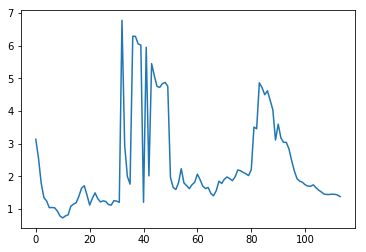

In [11]:
plt.plot(y_Hue)

Using a Desicion tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
est = DecisionTreeRegressor()
s_Hue = cross_val_score(est, X_Hue, y_Hue, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "R-MSE Hue %.3f (+/- %.5f)"%(np.sqrt(np.mean(s_Hue)), np.std(s_Hue))
s_YCrCb = cross_val_score(est, X_YCrCb, y_YCrCb, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "R-MSE YCrCb %.3f (+/- %.5f)"%(np.sqrt(np.mean(s_YCrCb)), np.std(s_YCrCb))

R-MSE Hue 1.210 (+/- 1.13612)
R-MSE YCrCb 0.338 (+/- 0.06181)


Using a SVM

In [20]:
from sklearn.svm import SVR
est = SVR()
s_Hue = cross_val_score(est, X_Hue, y_Hue, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "R-MSE Hue %.3f (+/- %.5f)"%(np.sqrt(np.mean(s_Hue)), np.std(s_Hue))
s_YCrCb = cross_val_score(est, X_YCrCb, y_YCrCb, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "R-MSE YCrCb %.3f (+/- %.5f)"%(np.sqrt(np.mean(s_YCrCb)), np.std(s_YCrCb))

R-MSE Hue 1.458 (+/- 0.93932)
R-MSE YCrCb 1.481 (+/- 1.27759)


A little more specific with respect local data results...

In [23]:
n =int(len(d)*0.7) 
est = DecisionTreeRegressor()
perm = np.random.permutation(len(d_Hue))

Xtr_YCrCb, ytr_YCrCb = X_YCrCb[perm[:n]], y_YCrCb[perm[:n]]
Xts_YCrCb, yts_YCrCb = X_YCrCb[perm[n:]], y_YCrCb[perm[n:]]

est.fit(Xtr_YCrCb, ytr_YCrCb)
print "R- MSE %.3f"% np.sqrt(mean_squared_error(yts_YCrCb, est.predict(Xts_YCrCb)))

R- MSE 0.333


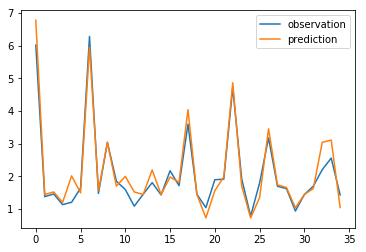

In [35]:
plt.plot(yts_YCrCb,  label='observation')
plt.plot( est.predict(Xts_YCrCb), label='prediction')
plt.legend()
plt.show()

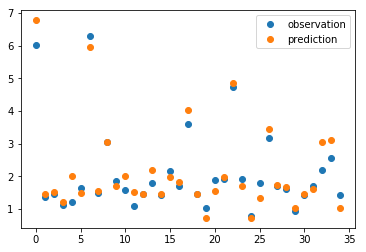

In [36]:
plt.plot(yts_YCrCb, 'o', label='observation')
plt.plot( est.predict(Xts_YCrCb), 'o', label='prediction')
plt.legend()
plt.show()

Text(0.5,1,u'showing only some random 35 test elements (BLACK line is error)')

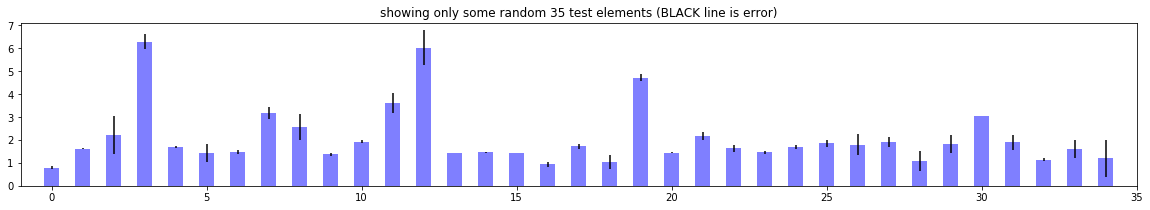

In [25]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts_YCrCb)
errs  = np.abs(yts_YCrCb - preds)
perm = np.random.permutation(range(len(yts_YCrCb)))[:40]
plt.bar(range(len(perm)), yts_YCrCb[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))